In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
np.random.seed(69)
x = np.random.randn(1000)
y = 5 + (6*x) + np.random.randn(1000)


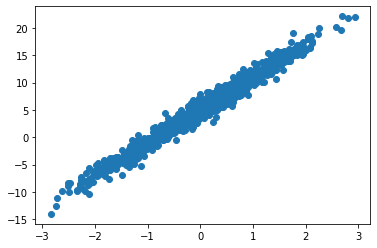

In [3]:
plt.scatter(x,y)
plt.show()

## Simple Linear Regrssion


In [4]:
xmean = x.mean()
ymean = y.mean()

In [5]:
num,den = 0,0
for i in range(1000):
    num += (x[i]-xmean)*(y[i]-ymean)
    den += (x[i]-xmean)**2
m = num/den
m

6.0066512469488735

In [6]:
c = ymean - (m*xmean)
c

5.004895089472314

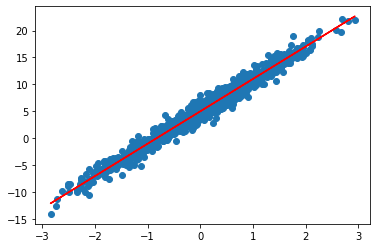

In [7]:
Y1 = m*x + c 
plt.scatter(x,y)
plt.plot(x,Y1,c = 'r')

## Using Gradient Descent


In [35]:
learning_rate = 0.00001
m1,c1 = 0,0
for i in range(500):
    Y2 = (m1*x)+c1
    der_m = (-2)*(sum(x*(y-Y2)))
    der_c = (-2)*(sum(y-Y2))
    
    m1 = m1-(learning_rate*der_m)
    c1 = c1-(learning_rate*der_c)


[]

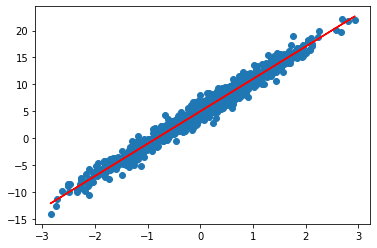

In [36]:
Y3 = (m1*x) + c1
plt.scatter(x,y)
plt.plot(x,Y3,c='r')
plt.plot()

## Using sklearn

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


In [38]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

lreg.fit(x_train,y_train)
Y4 = lreg.predict(x_test)

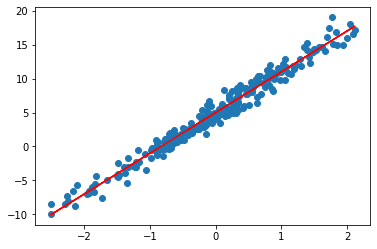

In [39]:
plt.scatter(x_test,y_test)
plt.plot(x_test,Y4,c='r')
plt.show()

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=Y4)

mse = mean_squared_error(y_true=y_test,y_pred=Y4) 
rmse = mean_squared_error(y_true=y_test,y_pred=Y4,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.7614528902140889
MSE: 0.957148056447083
RMSE: 0.9783394382560089


In [41]:
m2 = lreg.coef_

In [42]:
c2 = lreg.intercept_

In [43]:
M = [m,m1,m2[0][0]]
C = [c,c1,c2[0]]
df = pd.DataFrame([M,C],columns=['Simple LR','Using GD','Using Sklearn'],index=['Slope','Intercept'])
df

,Simple LR,Using GD,Using Sklearn
Slope,6.006651,6.006370,6.007251
Intercept,5.004895,5.004589,5.006576
